<a href="https://colab.research.google.com/github/pymacbit/ML-Colab-Book/blob/master/Model%20Tweaks/K-Fold%20Cross%20Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Fold Cross Validation




同樣的樣本，如何訓練可以做得更好

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 如何遠端下載資料集

In [ ]:
!gdown --id 1CKdLbayzvQQE3Hf1qYbD2w46VQf4Puwc --output Social_Network_Ads.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1CKdLbayzvQQE3Hf1qYbD2w46VQf4Puwc 



In [ ]:
# Importing the dataset_K_SVM 
dataset_K_SVM = pd.read_csv("Social_Network_Ads.csv")
x = dataset_K_SVM.iloc[:, [2,3]].values
y = dataset_K_SVM.iloc[:, 4].values
print(x[:10])
print(y[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
[0 0 0 0 0 0 0 1 0 0]


In [ ]:
# Splitting the dataset_K_SVM into Training set and Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[:10])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
# Fitting the SVM Intution to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[64,  4],
       [ 3, 29]])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:

# Applying the K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X =X_train, y = y_train, cv = 10)
print(accuracies.mean())#计算平均的测试准确率
print(accuracies.std())



0.9033333333333333
0.06574360974438671


In [ ]:
accuracies

array([0.8       , 0.96666667, 0.8       , 0.96666667, 0.86666667,
       0.86666667, 0.9       , 0.93333333, 1.        , 0.93333333])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test ))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.91      0.88      0.89        33

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


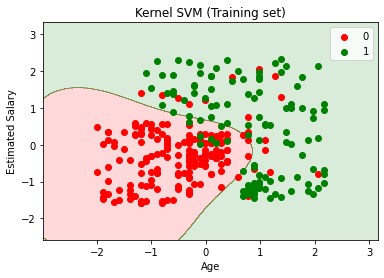

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 =np.meshgrid(np.arange(start =X_set[:,0].min()-1, stop= X_set[:, 0].max()+1,step = 0.01),
                    np.arange(start =X_set[:,1].min()-1, stop= X_set[:, 1].max()+1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X1.min(),X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
                c= ListedColormap(('red','green'))(i),label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


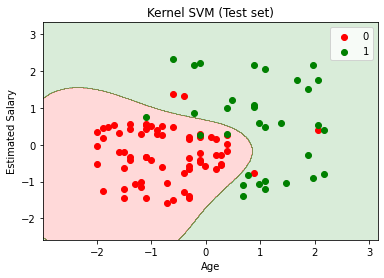

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 =np.meshgrid(np.arange(start =X_set[:,0].min()-1, stop= X_set[:, 0].max()+1,step = 0.01),
                    np.arange(start =X_set[:,1].min()-1, stop=  X_set[:, 1].max()+1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X1.min(),X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
                c= ListedColormap(('red','green'))(i),label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()